# Data analysis

### Import of libraries

In [155]:
import pandas as pd
import json
import numpy as np
# import scipy as sp
import matplotlib.pyplot as plt
import os, re, sys, glob, math
import warnings; warnings.simplefilter('ignore')
# import statsmodels.api as sm # import statsmodels
import lzma 
import base64
from statistics import mean, median
from matplotlib.ticker import PercentFormatter
# from datetime import datetime

### Import of data

In [156]:
subfolder = 'Pilot-October2022'
outputpath = f'../output/{subfolder}/'
outputpathErrors = f'../output/{subfolder}/errors/'

### Cleaning data

In [157]:
def merge_all_files(keyword,subfolder='main'):
    all_files = glob.glob(os.path.join(r'../data/'+subfolder+'/', keyword + '*.csv'))
    return pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True, sort=True)

data = merge_all_files('inference',subfolder=subfolder)
sessions = ['gofsghhu', 'a6e292sf'] 
# taskDifficultyValues = [1,2]
# Only keep those in-session who finished 
data = data[data['session.code'].isin(sessions) & data['participant._current_page_name'].isin(['Redirect'])]
print(len(data))

100


## CQs

informational_cost.1.player.cq1_mistakes


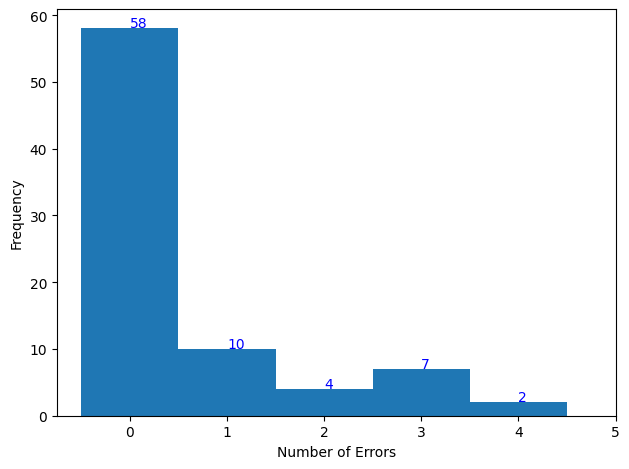

informational_cost.1.player.cq2_mistakes


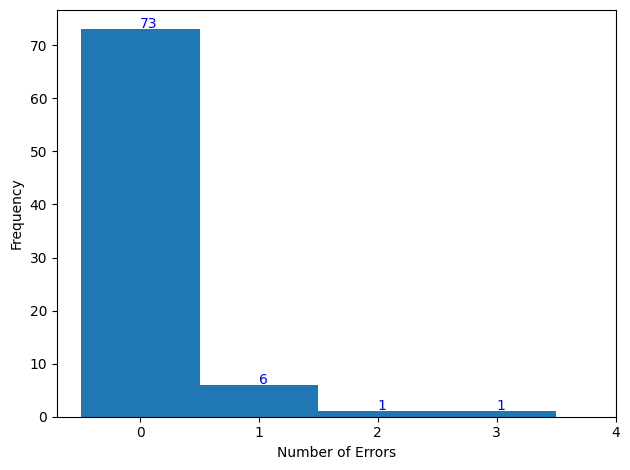

informational_cost.1.player.cq3_mistakes


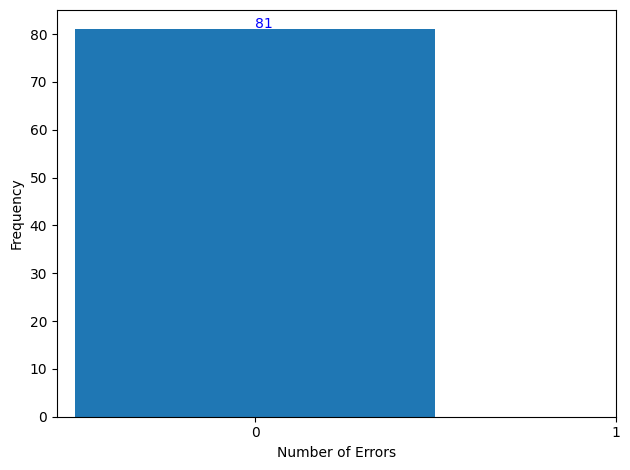

informational_cost.1.player.cq_part2_mistakes


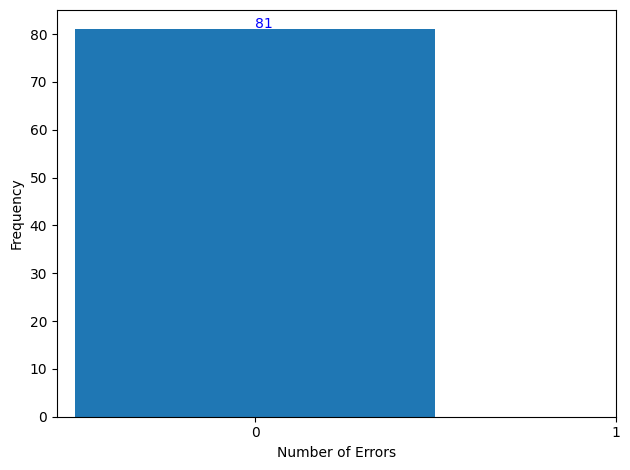

informational_cost.1.player.info_cost_cq_mistakes


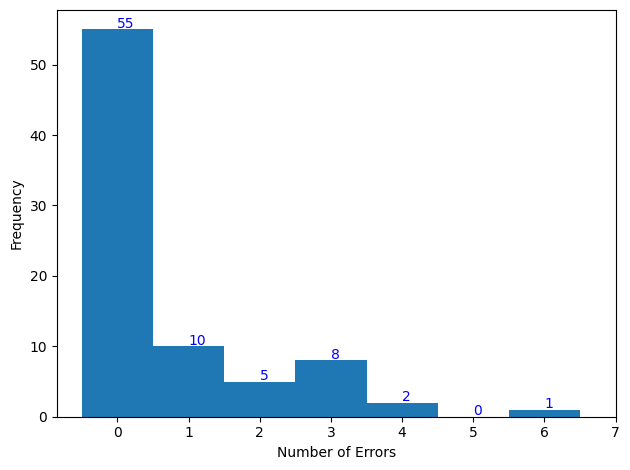

informational_cost.10.player.cq1_mistakes


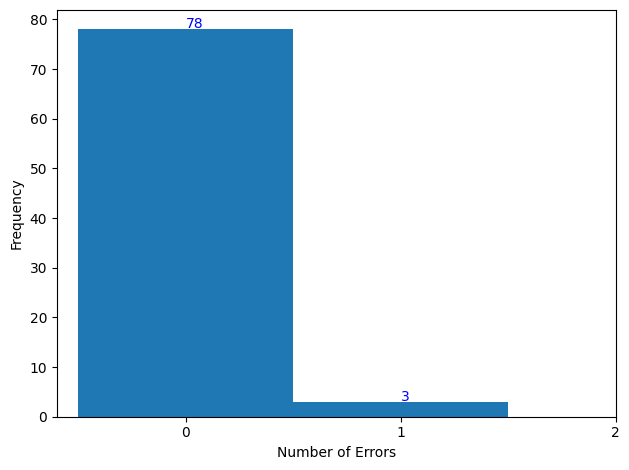

informational_cost.10.player.cq2_mistakes


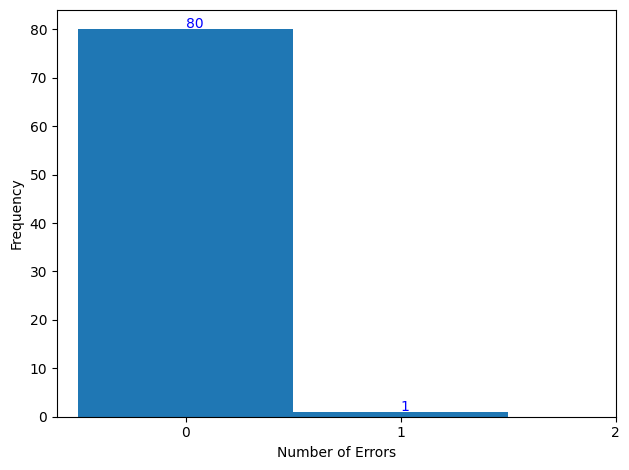

informational_cost.10.player.cq3_mistakes


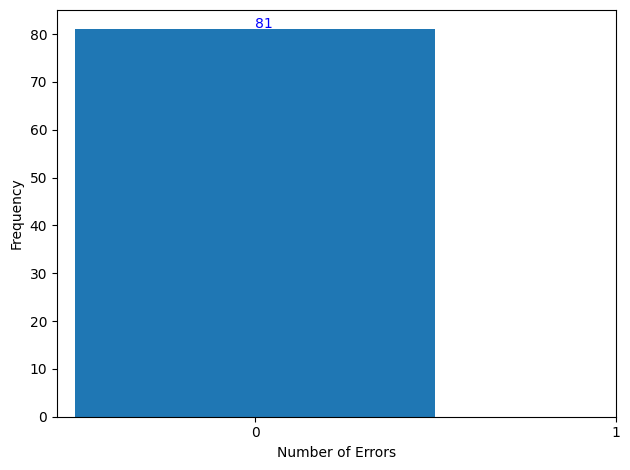

informational_cost.10.player.cq_part2_mistakes


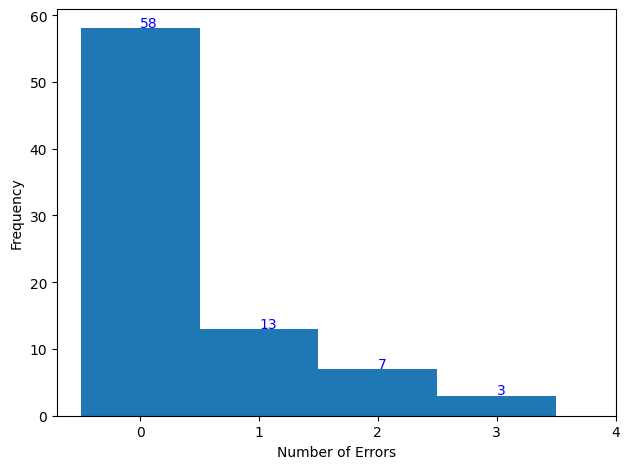

informational_cost.10.player.info_cost_cq_mistakes


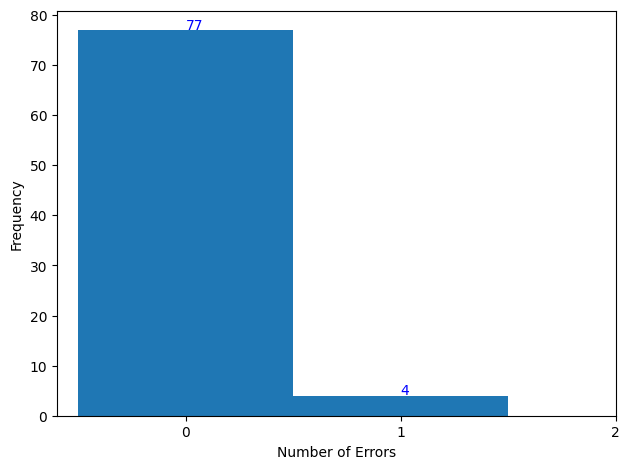

informational_cost.2.player.cq1_mistakes


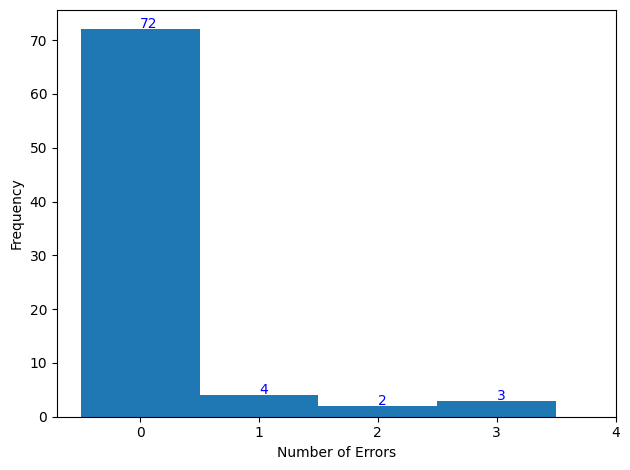

informational_cost.2.player.cq2_mistakes


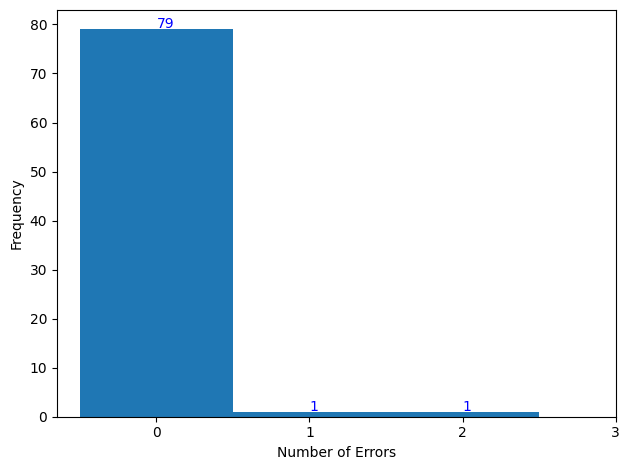

informational_cost.2.player.cq3_mistakes


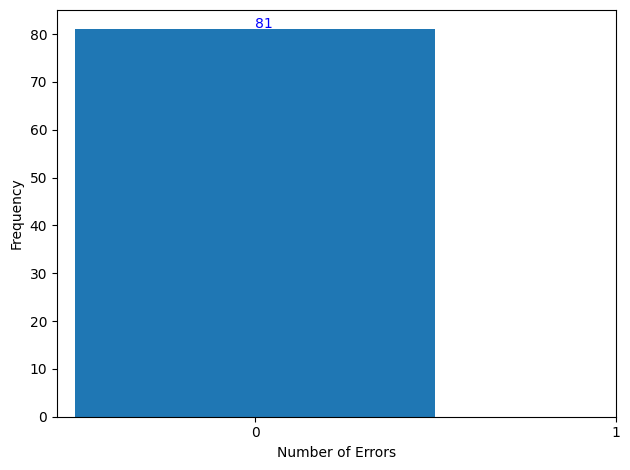

informational_cost.2.player.cq_part2_mistakes


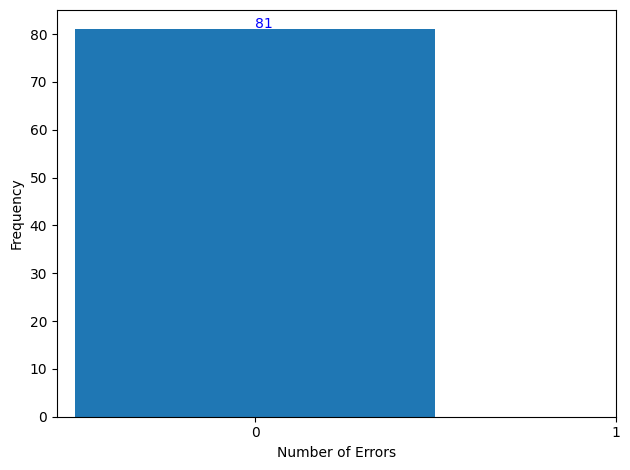

informational_cost.2.player.info_cost_cq_mistakes


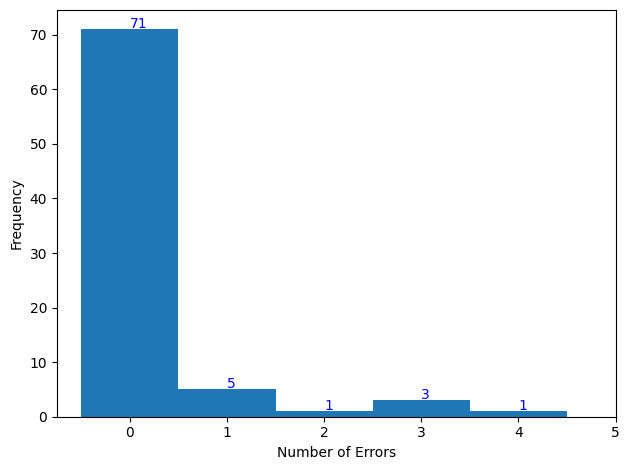

informational_cost.3.player.cq1_mistakes


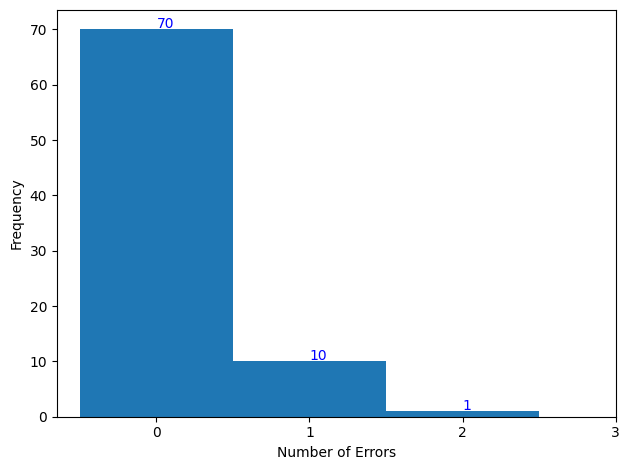

informational_cost.3.player.cq2_mistakes


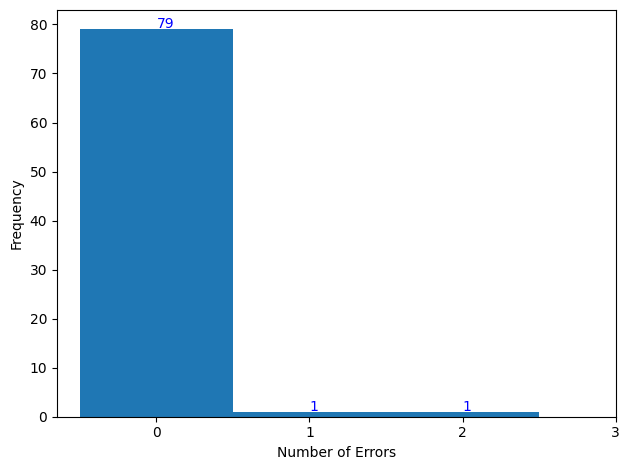

informational_cost.3.player.cq3_mistakes


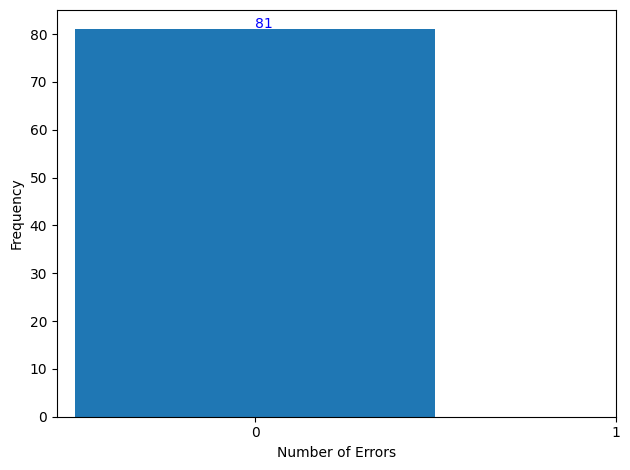

informational_cost.3.player.cq_part2_mistakes


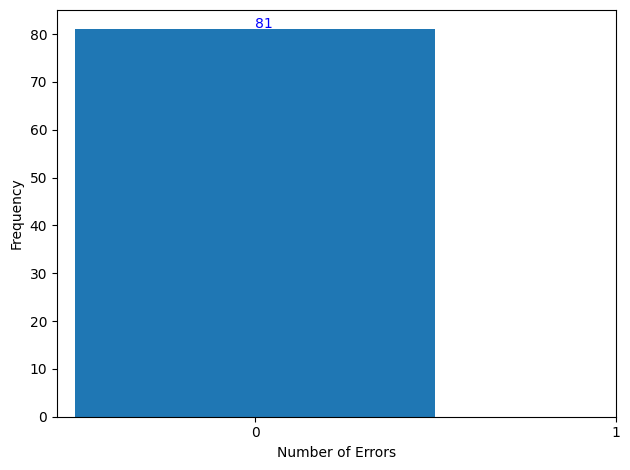

informational_cost.3.player.info_cost_cq_mistakes


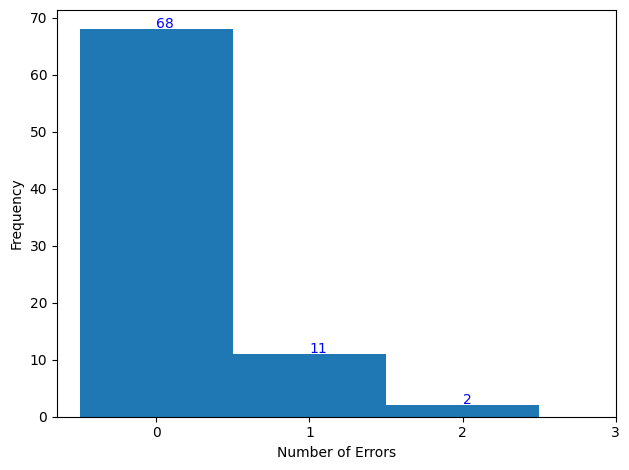

informational_cost.4.player.cq1_mistakes


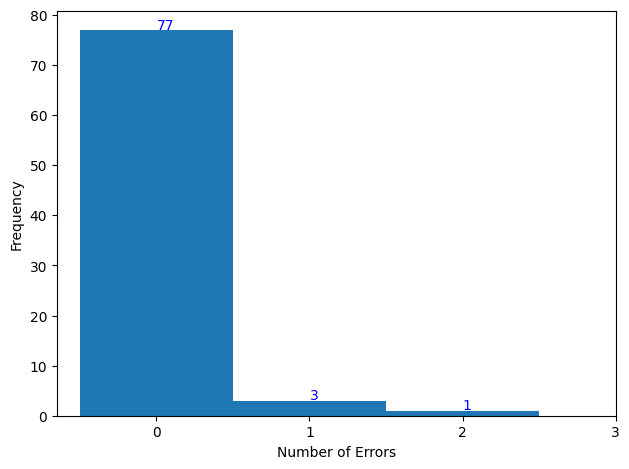

informational_cost.4.player.cq2_mistakes


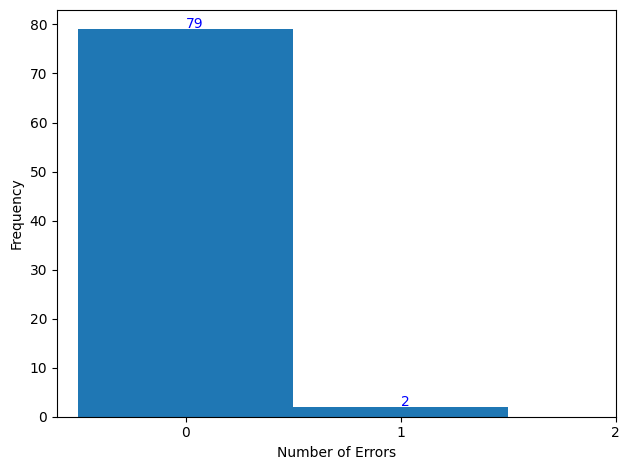

informational_cost.4.player.cq3_mistakes


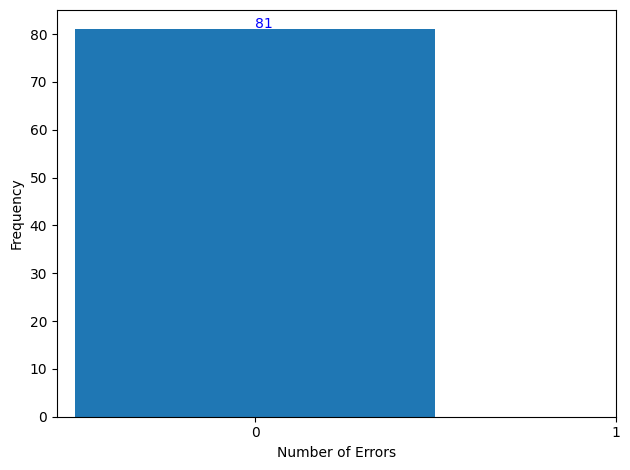

informational_cost.4.player.cq_part2_mistakes


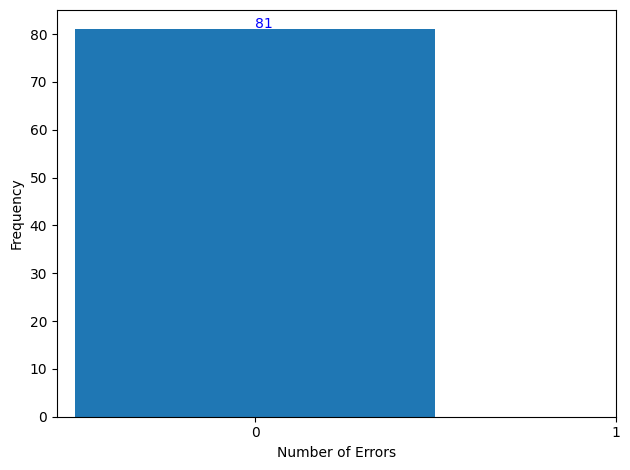

informational_cost.4.player.info_cost_cq_mistakes


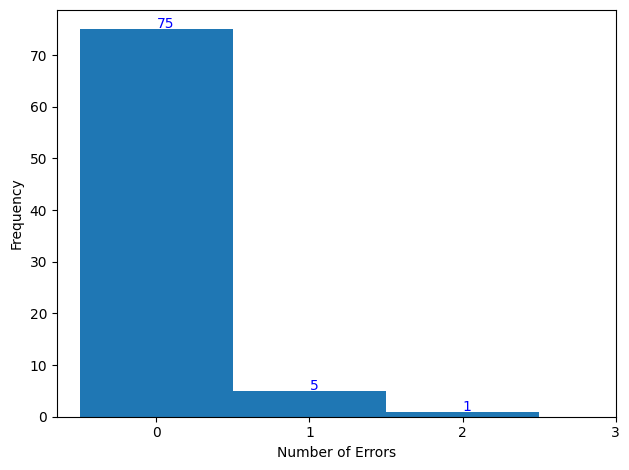

informational_cost.5.player.cq1_mistakes


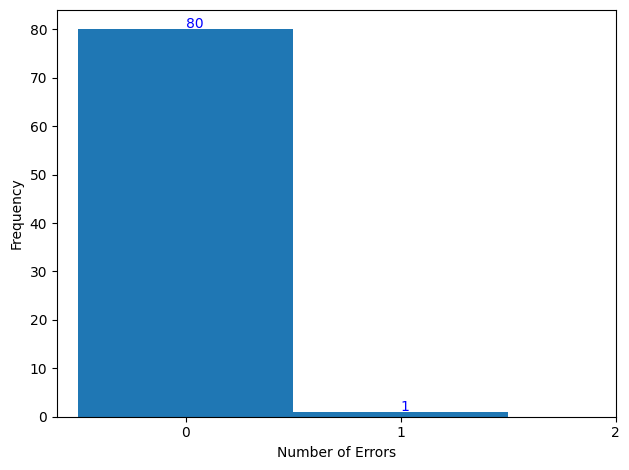

informational_cost.5.player.cq2_mistakes


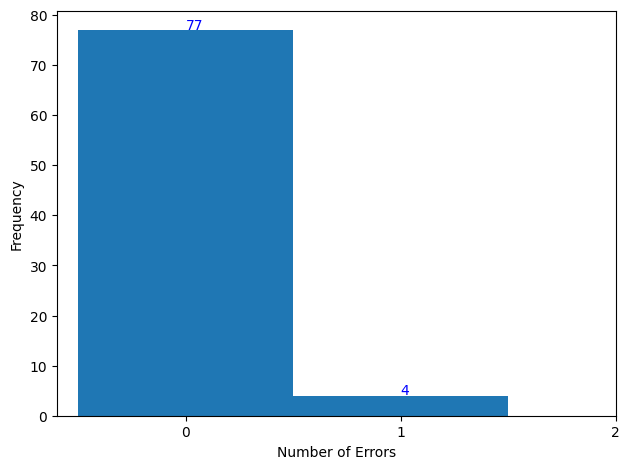

informational_cost.5.player.cq3_mistakes


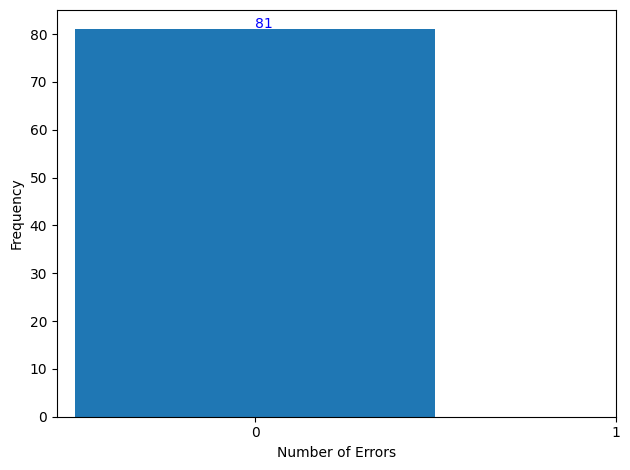

informational_cost.5.player.cq_part2_mistakes


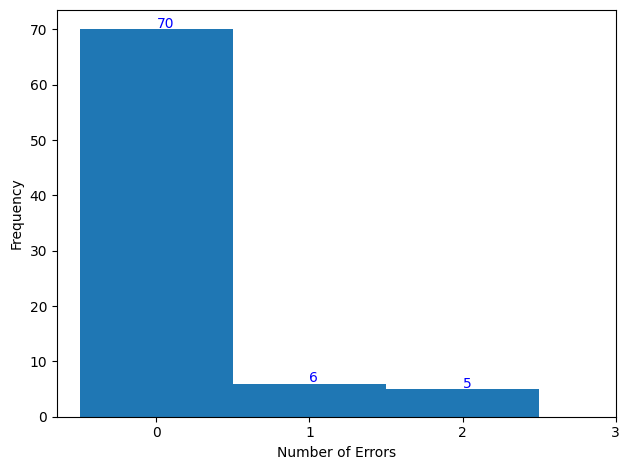

informational_cost.5.player.info_cost_cq_mistakes


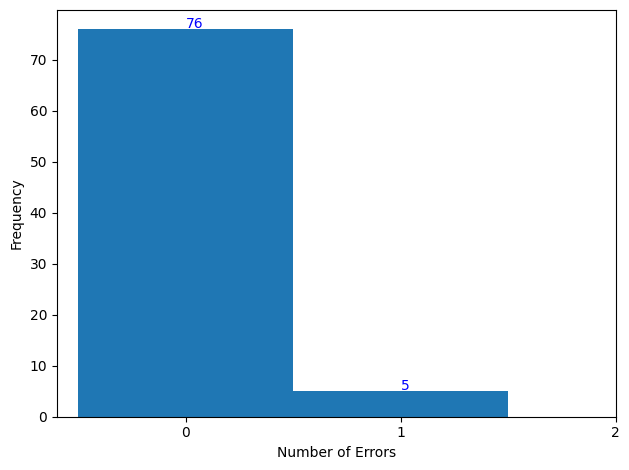

informational_cost.6.player.cq1_mistakes


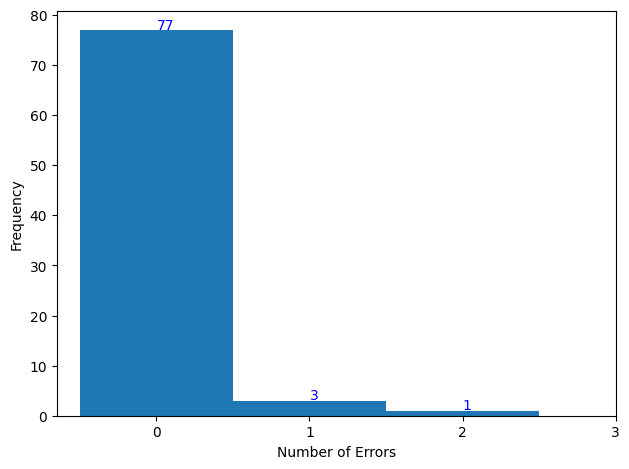

informational_cost.6.player.cq2_mistakes


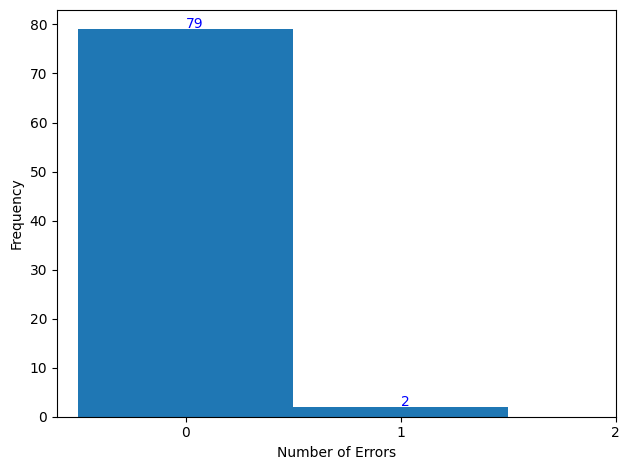

informational_cost.6.player.cq3_mistakes


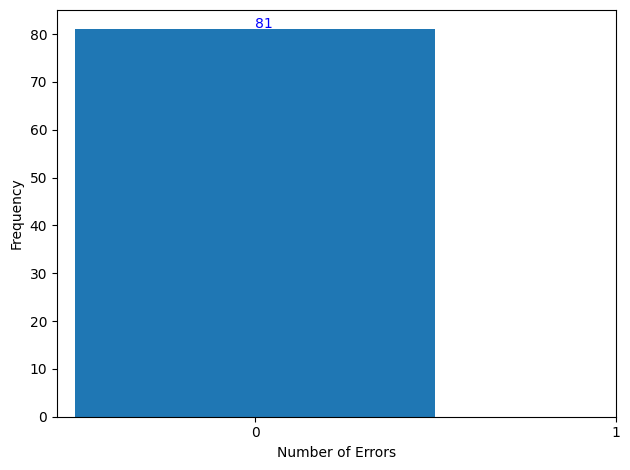

informational_cost.6.player.cq_part2_mistakes


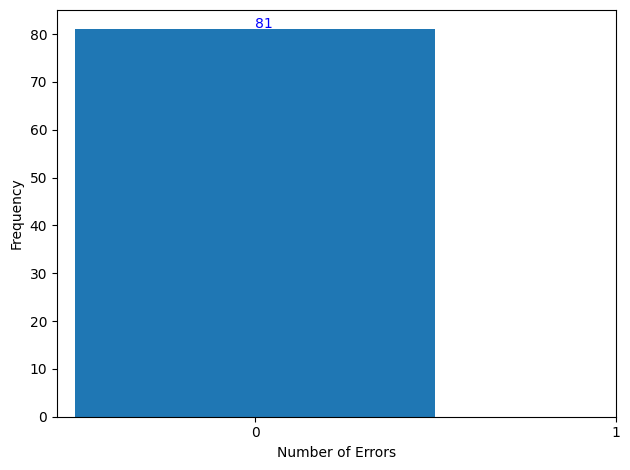

informational_cost.6.player.info_cost_cq_mistakes


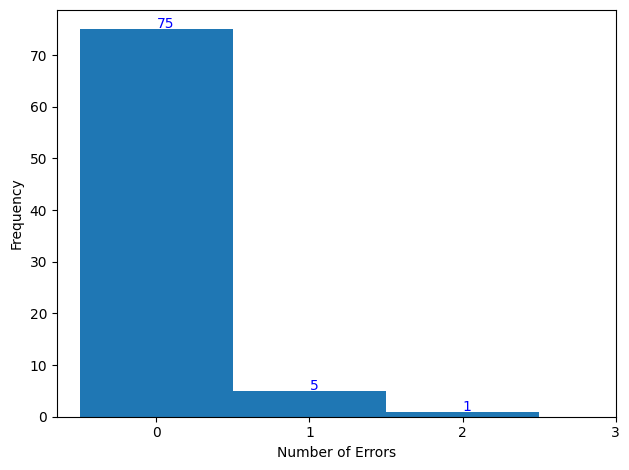

informational_cost.7.player.cq1_mistakes


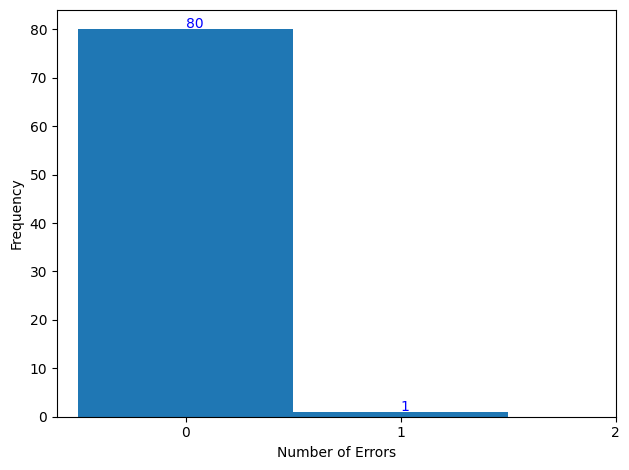

informational_cost.7.player.cq2_mistakes


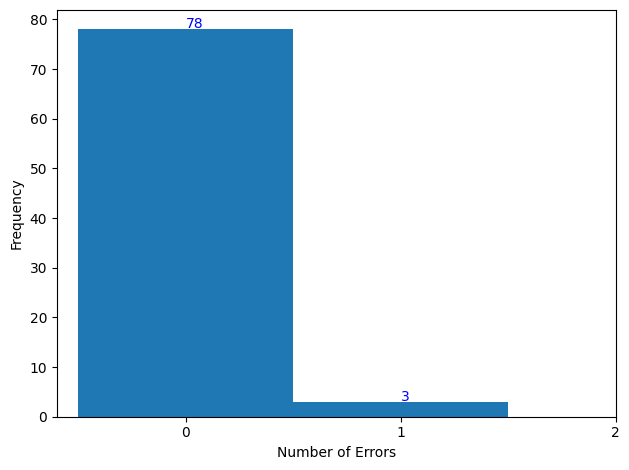

informational_cost.7.player.cq3_mistakes


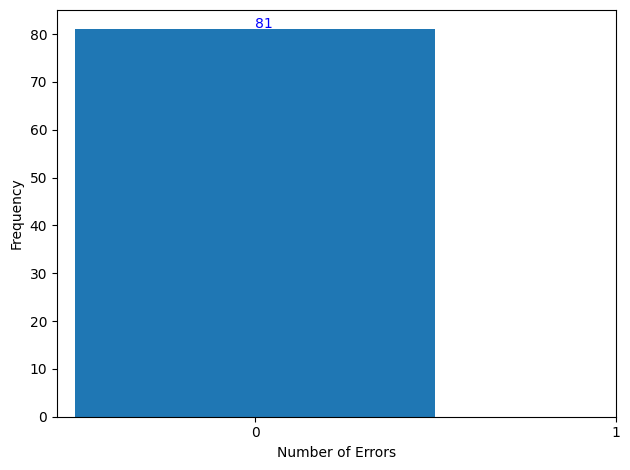

informational_cost.7.player.cq_part2_mistakes


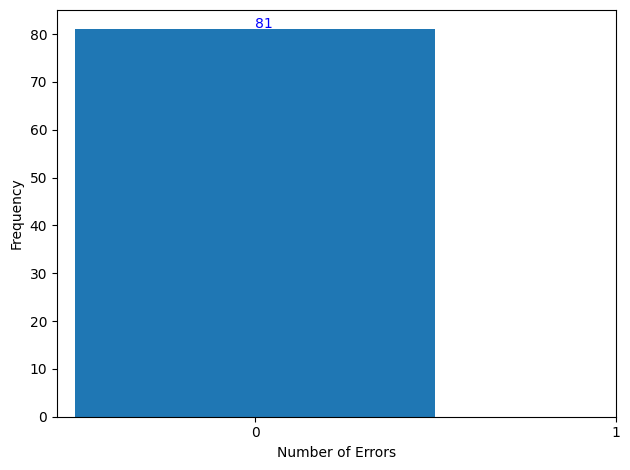

informational_cost.7.player.info_cost_cq_mistakes


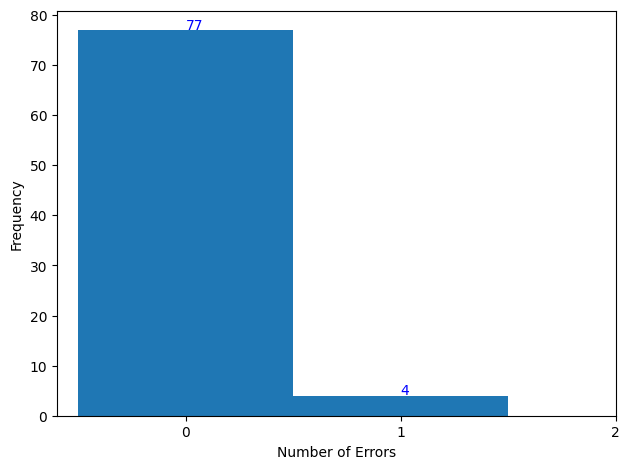

informational_cost.8.player.cq1_mistakes


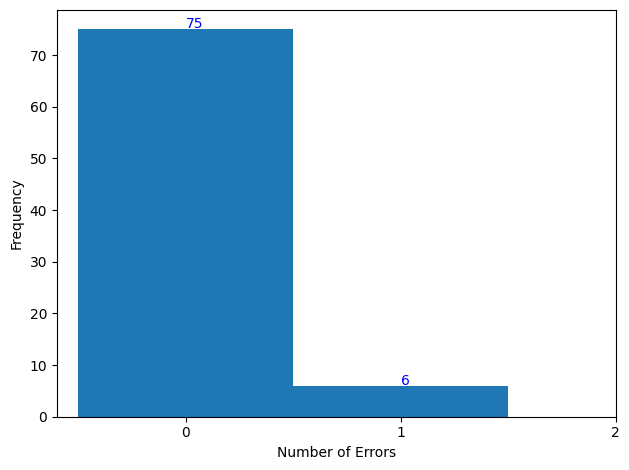

informational_cost.8.player.cq2_mistakes


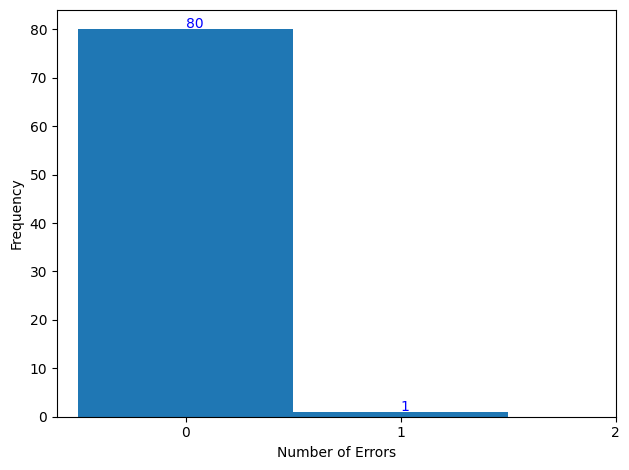

informational_cost.8.player.cq3_mistakes


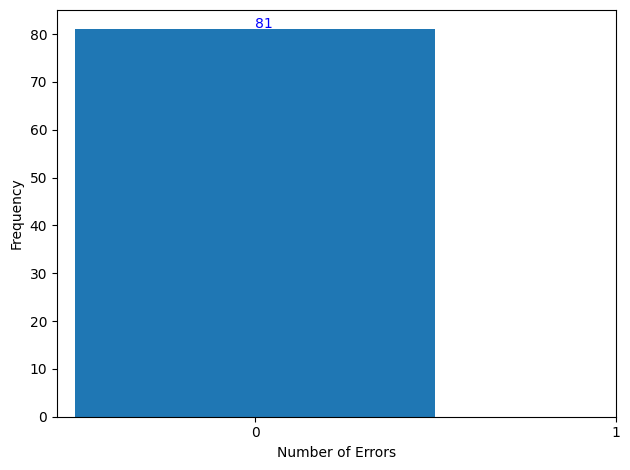

informational_cost.8.player.cq_part2_mistakes


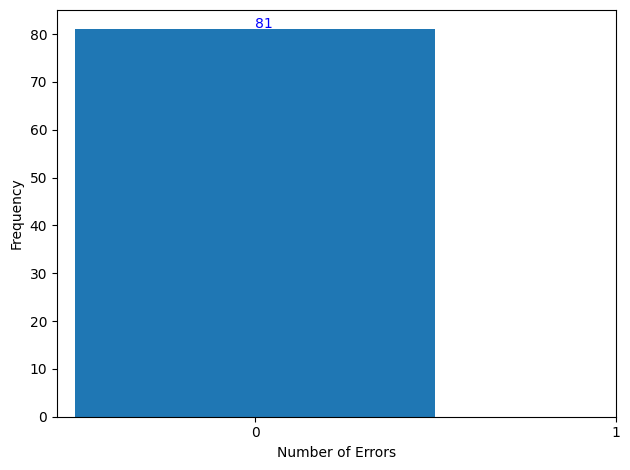

informational_cost.8.player.info_cost_cq_mistakes


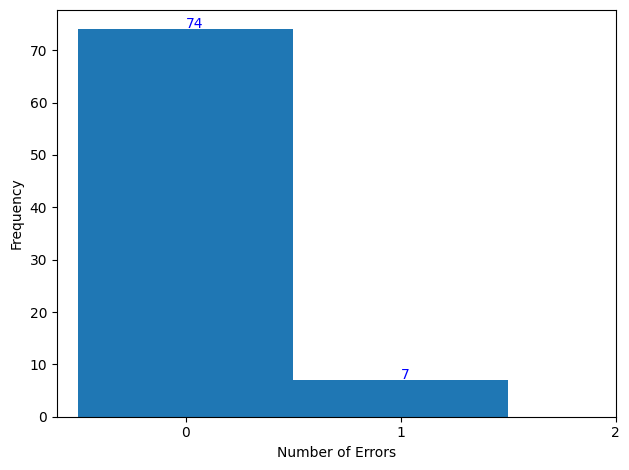

informational_cost.9.player.cq1_mistakes


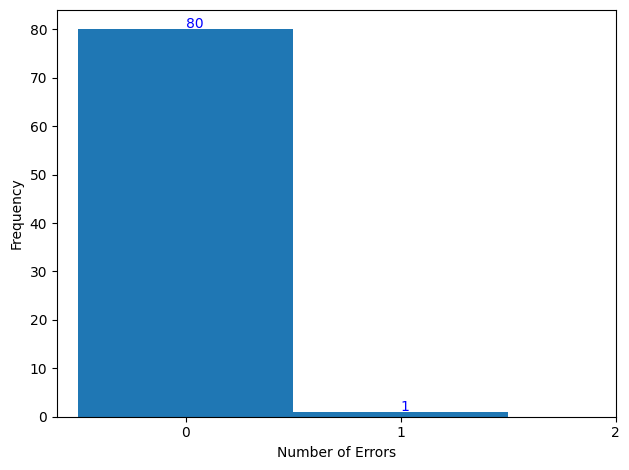

informational_cost.9.player.cq2_mistakes


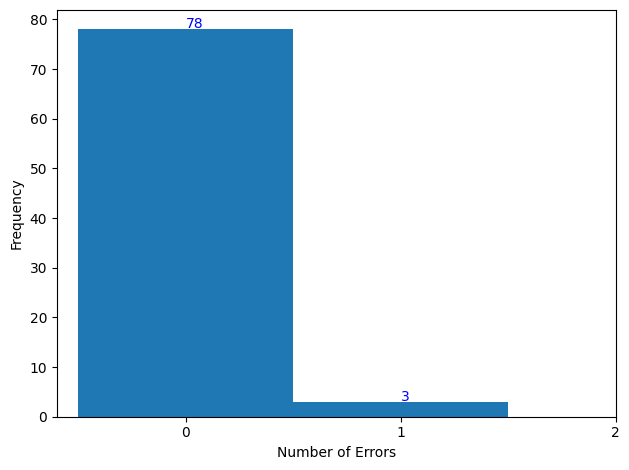

informational_cost.9.player.cq3_mistakes


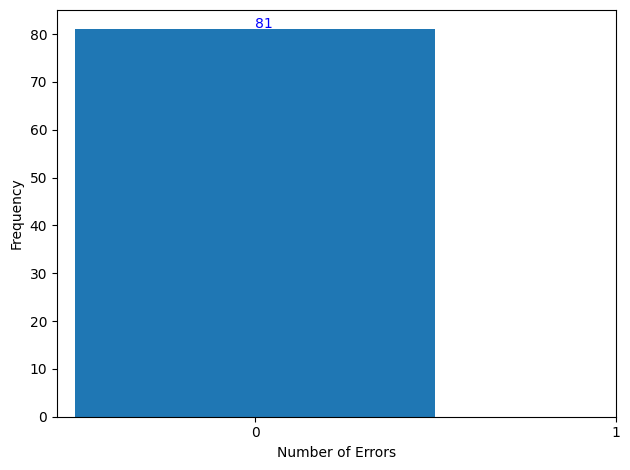

informational_cost.9.player.cq_part2_mistakes


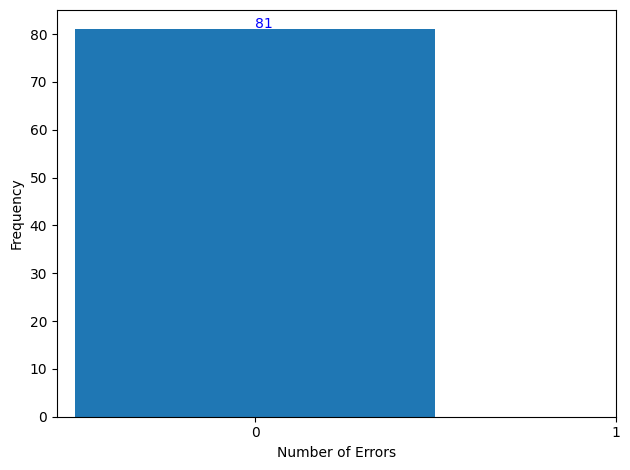

informational_cost.9.player.info_cost_cq_mistakes


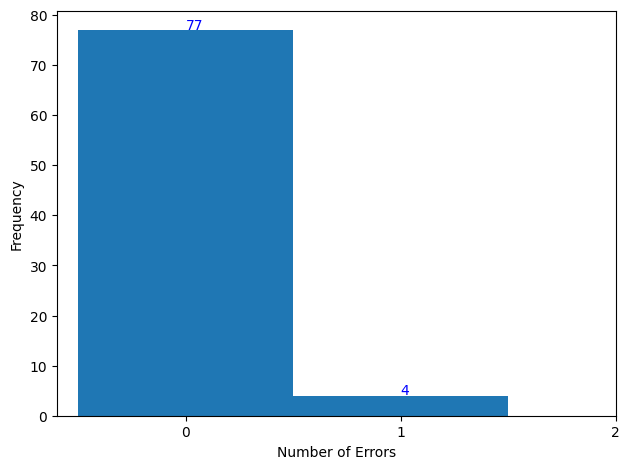

intro.1.player.cq1_det_mistakes


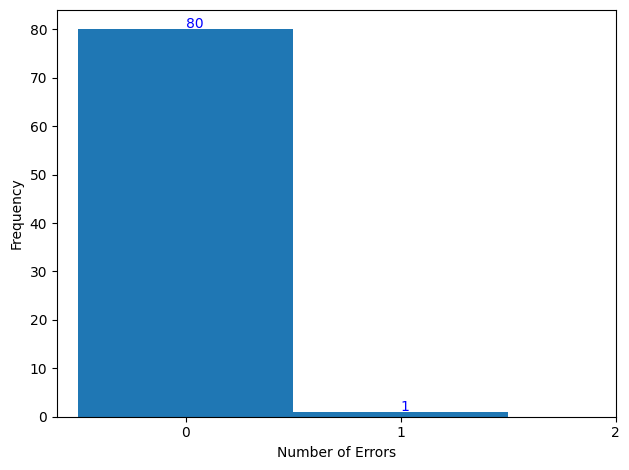

intro.1.player.cq1_mistakes


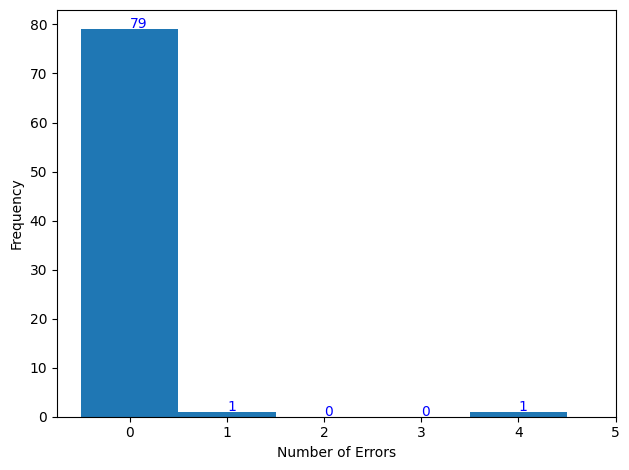

intro.1.player.cq2_det_mistakes


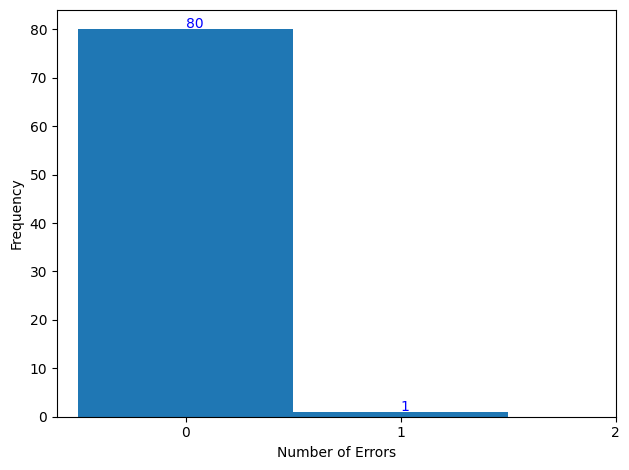

intro.1.player.cq2_mistakes


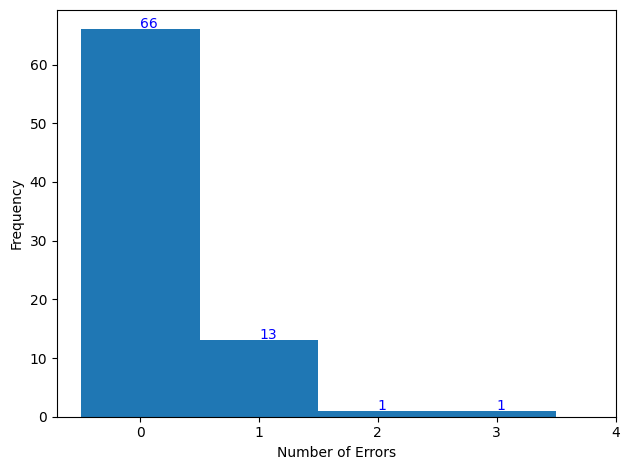

intro.1.player.cq3_det_mistakes


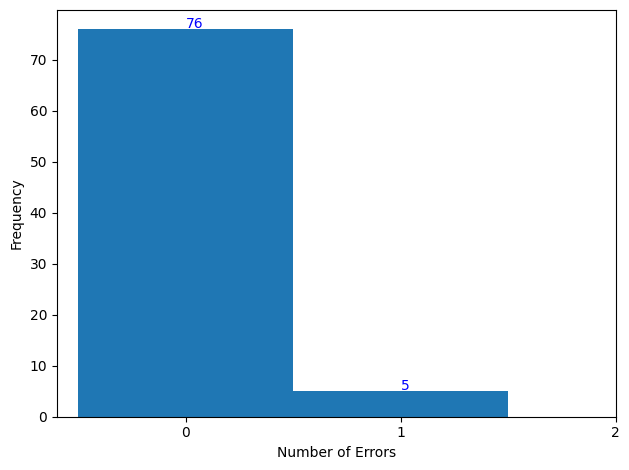

intro.1.player.cq3_mistakes


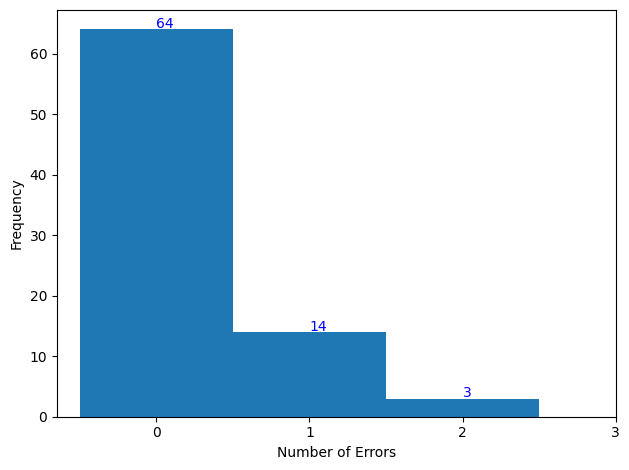

intro.1.player.cq4_det_mistakes


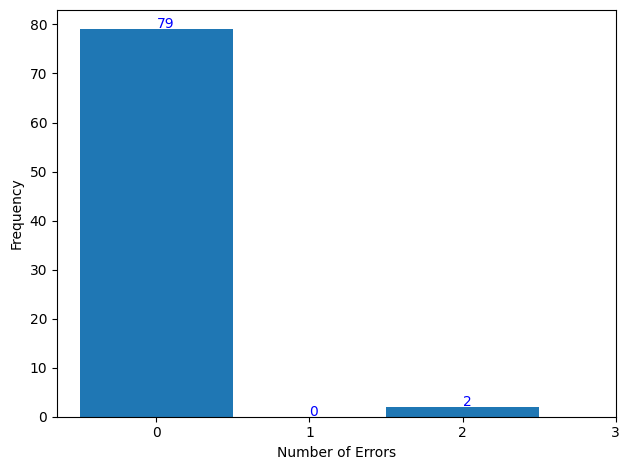

intro.1.player.cq4_mistakes


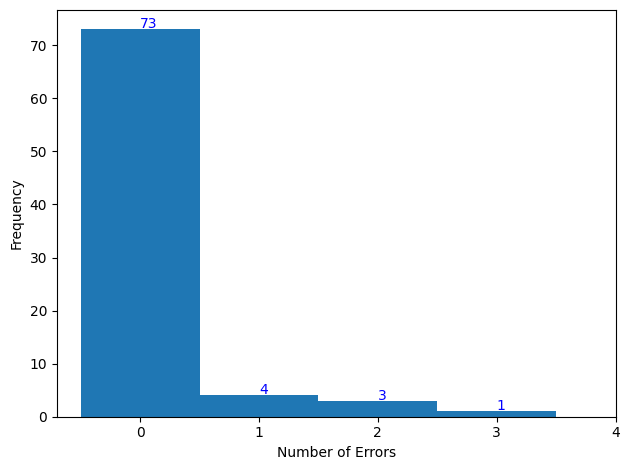

intro.1.player.cq5_det_mistakes


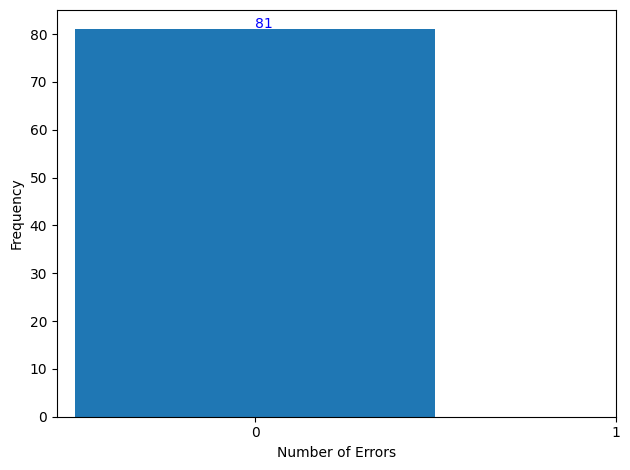

intro.1.player.cq5_mistakes


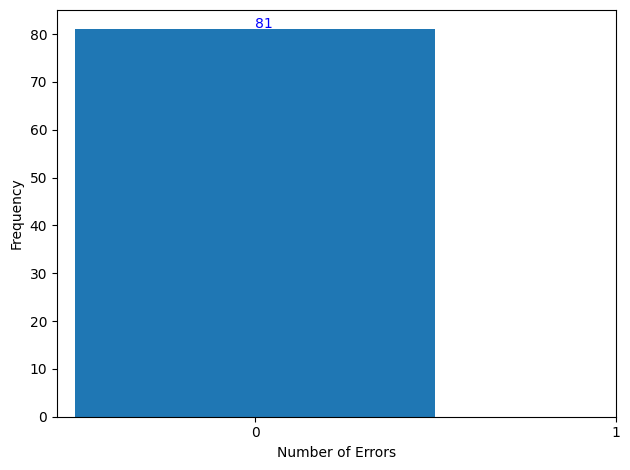

intro.1.player.intro_cq_mistakes


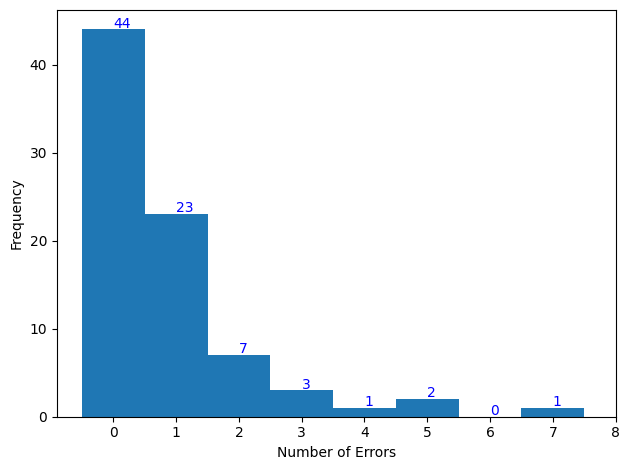

cum_mistakes


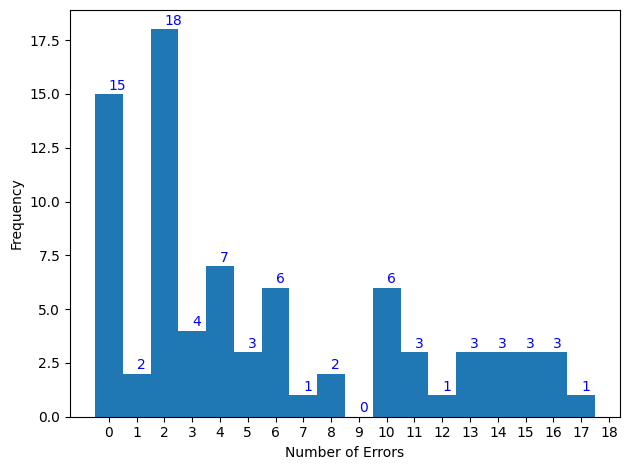

In [161]:
col_list = []
col_list_names = []
for col in data.columns.values:
    if col.endswith('_mistakes'):
        col_list.append(data[col])
        col_list_names.append(col)

for var in col_list:
    try:
        print(var.name)
        fig, ax = plt.subplots()
        y = [int(i) for i in  var]
        xLabels = range(max(y)+2)
        x = np.arange(max(y)+2)
        ax.hist(y,x-0.5, width=1)
        plt.ylabel('Frequency')
        for i in range(max(y)+1):
            plt.text(i,y.count(i)+.2,y.count(i), color='blue')
        plt.xticks(x, xLabels)
        plt.xlabel('Number of Errors')
#         plt.title(f"{var.name[19:-9]}; N={len(var)}")
        plt.tight_layout()
#         plt.savefig(outputpathErrors+ var.name[10:-9] +'.png',dpi=1000)
        plt.show()
    except:
        print('Variable missing:', var.name)

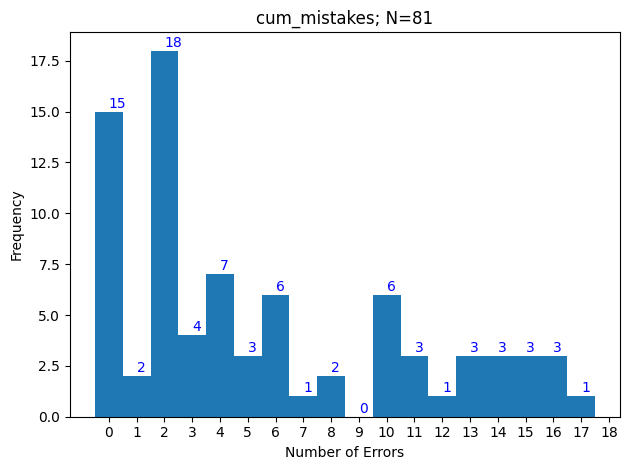

In [160]:
data['cum_mistakes']=data[col_list_names].sum(axis=1)

var = data[data['cum_mistakes']<20]['cum_mistakes']
fig, ax = plt.subplots()
y = [int(i) for i in  var]
xLabels = range(max(y)+2)
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+1):
    plt.text(i,y.count(i)+.2,y.count(i), color='blue')
plt.xticks(x, xLabels)
plt.xlabel('Number of Errors')
plt.title(f"{var.name}; N={len(var)}")
plt.tight_layout()
plt.savefig(outputpathErrors+ var.name +'.png',dpi=1000)
plt.show()

data = data[data['cum_mistakes']<20]

## Treatments

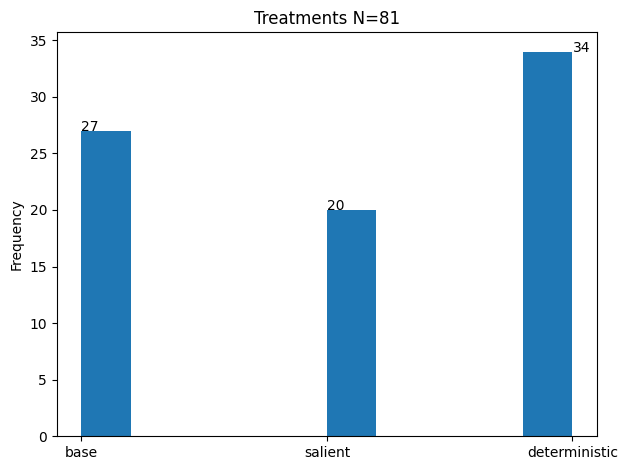

In [137]:
fig, ax = plt.subplots()
y = [i for i in  data['participant.treatment']]
# Labels = ['naive', 'baseline', 'soph']
Labels = ['base', 'salient', 'deterministic']
ax.hist(y)
plt.ylabel('Frequency')
for j in range(3):
    plt.text(j,y.count(Labels[j]),str(y.count(Labels[j])))
plt.title(f'Treatments N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + 'treatments.png',dpi=1000)
plt.show()

### Destring param_rounds 

In [138]:
try:
    for ind in data.index:
        ini_list = data['participant.param_rounds'][ind]
        res = ini_list.strip('][').split(', ')
        data['participant.param_rounds'][ind] = res
    print(data['participant.param_rounds'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')

1      [1, 5, 3, 2, 4, 10, 7, 6, 9, 8]
2      [3, 4, 1, 5, 2, 6, 8, 7, 10, 9]
3      [1, 4, 5, 3, 2, 8, 7, 10, 6, 9]
4      [2, 4, 3, 1, 5, 7, 6, 8, 9, 10]
6      [2, 3, 1, 5, 4, 10, 8, 6, 9, 7]
                    ...               
478    [4, 3, 1, 5, 2, 9, 10, 8, 7, 6]
479    [1, 4, 5, 3, 2, 6, 10, 9, 7, 8]
481    [1, 3, 5, 4, 2, 10, 8, 9, 7, 6]
482    [2, 1, 5, 3, 4, 8, 10, 7, 9, 6]
483    [5, 3, 1, 2, 4, 7, 9, 10, 6, 8]
Name: participant.param_rounds, Length: 81, dtype: object


### Decision 1 lottery choice

In [139]:
for i in range(1,11):
    myList = []
    for ind in data.index:
        myList.append(int(data['participant.param_rounds'][ind][i-1]))
    #     print(myList,  data['participant.param_rounds'][ind])
    data[f'Round{i}Param'] = myList
    print(data[f'Round{i}Param'].head(), data['participant.param_rounds'].head())

    # Did each person choose the risky option in the parametrization that corresponds to their first decision?
    risk_list = []
    for ind in data.index:
        param = data[f'Round{i}Param'][ind]
        param = param if param<6 else param-5
        risk_taker = 1 if data[f'lottery.1.player.lottery{param}'][ind] == 1 else 0
        risk_list.append(risk_taker)
    data[f'risk_taker_R{i}'] = risk_list

1    1
2    3
3    1
4    2
6    2
Name: Round1Param, dtype: int64 1    [1, 5, 3, 2, 4, 10, 7, 6, 9, 8]
2    [3, 4, 1, 5, 2, 6, 8, 7, 10, 9]
3    [1, 4, 5, 3, 2, 8, 7, 10, 6, 9]
4    [2, 4, 3, 1, 5, 7, 6, 8, 9, 10]
6    [2, 3, 1, 5, 4, 10, 8, 6, 9, 7]
Name: participant.param_rounds, dtype: object
1    5
2    4
3    4
4    4
6    3
Name: Round2Param, dtype: int64 1    [1, 5, 3, 2, 4, 10, 7, 6, 9, 8]
2    [3, 4, 1, 5, 2, 6, 8, 7, 10, 9]
3    [1, 4, 5, 3, 2, 8, 7, 10, 6, 9]
4    [2, 4, 3, 1, 5, 7, 6, 8, 9, 10]
6    [2, 3, 1, 5, 4, 10, 8, 6, 9, 7]
Name: participant.param_rounds, dtype: object
1    3
2    1
3    5
4    3
6    1
Name: Round3Param, dtype: int64 1    [1, 5, 3, 2, 4, 10, 7, 6, 9, 8]
2    [3, 4, 1, 5, 2, 6, 8, 7, 10, 9]
3    [1, 4, 5, 3, 2, 8, 7, 10, 6, 9]
4    [2, 4, 3, 1, 5, 7, 6, 8, 9, 10]
6    [2, 3, 1, 5, 4, 10, 8, 6, 9, 7]
Name: participant.param_rounds, dtype: object
1    2
2    5
3    3
4    1
6    5
Name: Round4Param, dtype: int64 1    [1, 5, 3, 2, 4, 10, 7, 6, 9, 8]
2 

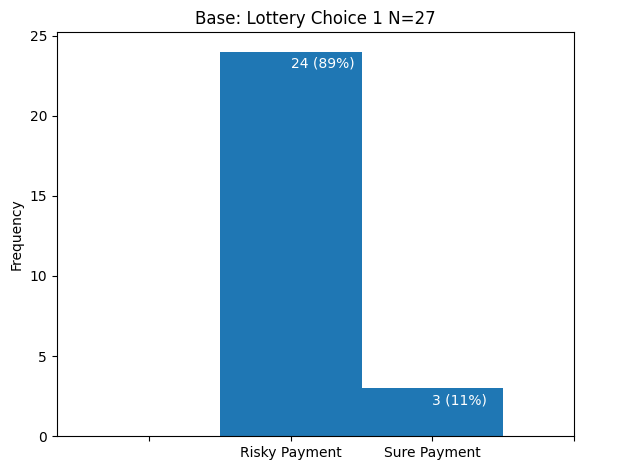

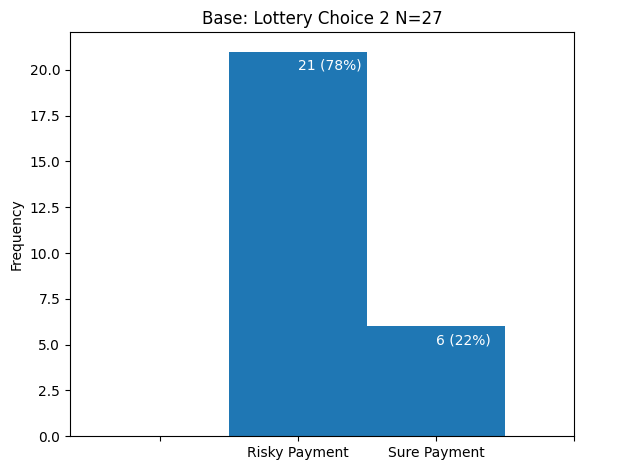

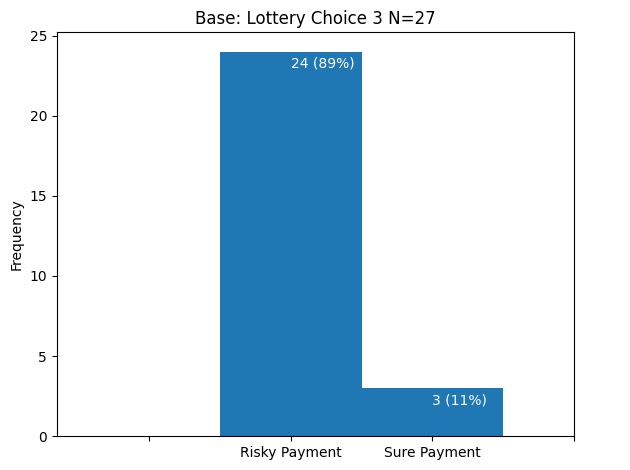

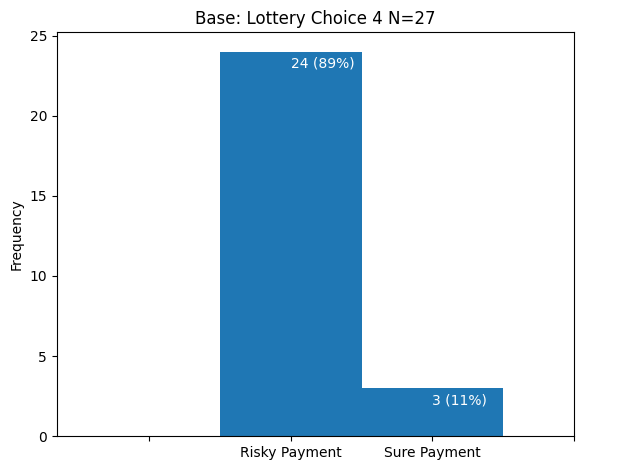

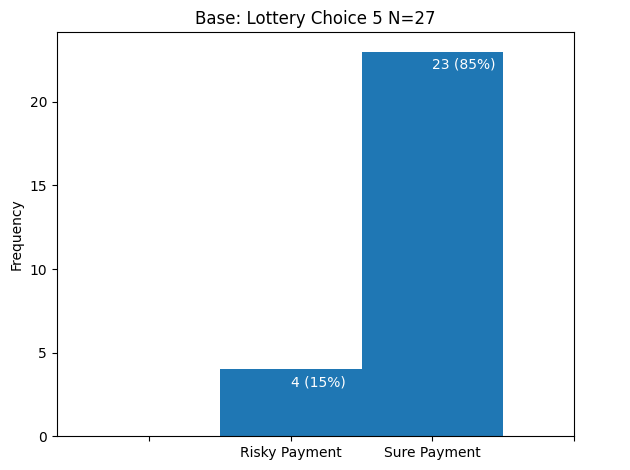

In [175]:
for i in range(1,6):    
    fig, ax = plt.subplots()
#     base_risk = base[base[f'risk_taker_R{i}'] == 1]
    y = [int(i) for i in base[f'lottery.1.player.lottery{i}']]
    xLabels = ['','Risky Payment', 'Sure Payment','']
    x = np.arange(max(y)+2)
    ax.hist(y,x-0.5, width=1)
    plt.ylabel('Frequency')
    for j in range(max(y)+2):
        plt.text(j,y.count(j)-1,str(y.count(j))+ ' (' + str(round(y.count(j)*100/len(y))) +'%)', color='white')
    plt.xticks(x, xLabels)
    plt.title(f'Base: Lottery Choice {i} N={len(y)}')
    plt.tight_layout()
#     plt.savefig(outputpath + 'Base_environment1.png',dpi=1000)
    plt.show()

## Base

In [140]:
base = data[data['participant.treatment']== 'base']

#  How many pooled in round 1 when pooling was optimal?
print(base[base['Round1Param'] == 5]['informational_cost.1.player.environment_choice'])

# How many participants chose risky option in lottery?
base[base['risk_taker_R1'] == 1]['risk_taker_R1'].count()

42     0.0
87     1.0
467    1.0
469    1.0
483    0.0
Name: informational_cost.1.player.environment_choice, dtype: float64


19

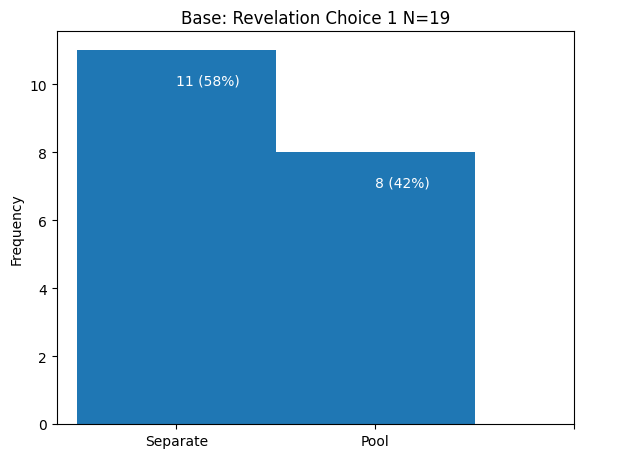

In [141]:
fig, ax = plt.subplots()
base_risk = base[base['risk_taker_R1'] == 1]
y = [int(i) for i in base_risk[base_risk['Round1Param'] != 5]['informational_cost.1.player.environment_choice']]
xLabels = ['Separate', 'Pool', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base: Revelation Choice 1 N={len(y)}')
plt.tight_layout()
plt.savefig(outputpath + 'Base_environment1.png',dpi=1000)
plt.show()

## Deterministic

In [142]:
det = data[data['participant.treatment'] == 'deterministic']
print(len(det))

34


In [143]:
#  How many pooled in round 1 when pooling was optimal?
print(det[det['Round1Param'] == 5]['informational_cost.1.player.environment_choice'])

# DIFFERENT FOR DET
# Did each person choose the safe option in the parametrization that corresponds to their first decision?
risk_list = []
for ind in det.index:
    param1 = det['Round1Param'][ind]
    risk_taker = 1 if det[f'lottery.1.player.lottery{param1}_det'][ind] == 1 else 0
    risk_list.append(risk_taker)
det['risk_taker_R1'] = risk_list
# How many participants chose risky option in lottery? In det we want on one to have picked risky
det[det['risk_taker_R1'] == 1]['risk_taker_R1'].count()

22    0.0
30    1.0
37    0.0
40    0.0
59    1.0
Name: informational_cost.1.player.environment_choice, dtype: float64


0

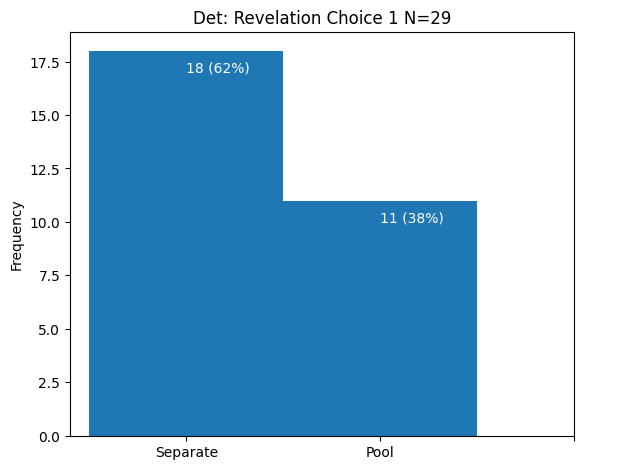

In [144]:
fig, ax = plt.subplots()
det_safe = det[det['risk_taker_R1'] == 0]
y = [int(i) for i in det_safe[det_safe['Round1Param'] != 5]['informational_cost.1.player.environment_choice']]
xLabels = ['Separate', 'Pool', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Det: Revelation Choice 1 N={len(y)}')
plt.tight_layout()
plt.savefig(outputpath + 'Det_environment1.png',dpi=1000)
plt.show()

## Salient

In [145]:
salient = data[data['participant.treatment']== 'salient']

#  How many pooled in round 1 when pooling was optimal?
print(salient[salient['Round1Param'] == 5]['informational_cost.1.player.environment_choice'])

# How many participants chose risky option in lottery?
salient[salient['risk_taker_R1'] == 1]['risk_taker_R1'].count()

10    0.0
84    0.0
Name: informational_cost.1.player.environment_choice, dtype: float64


13

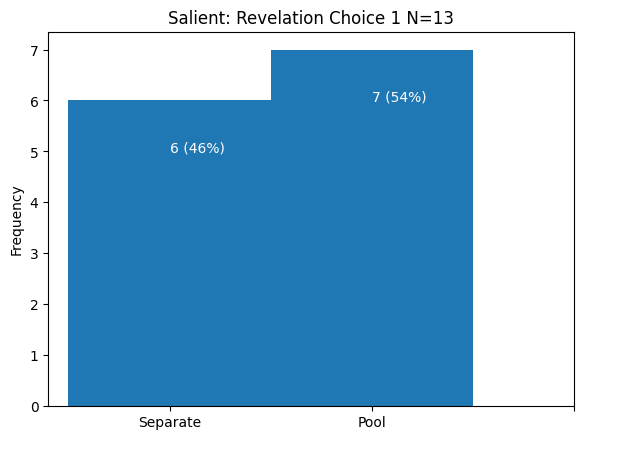

In [146]:
fig, ax = plt.subplots()
salient_risk = salient[salient['risk_taker_R1'] == 1]
y = [int(i) for i in salient_risk[salient_risk['Round1Param'] != 5]['informational_cost.1.player.environment_choice']]
xLabels = ['Separate', 'Pool', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient: Revelation Choice 1 N={len(y)}')
plt.tight_layout()
plt.savefig(outputpath + 'Salient_environment1.png',dpi=1000)
plt.show()

## Revelation by decision

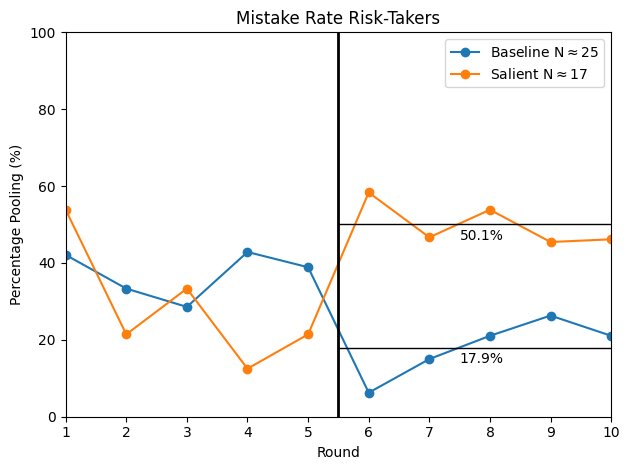

In [165]:
avgs_base = []
avgs_det = []
avgs_salient= []
for i in range(1,11):
#     BASELINE
    base_risk = base[base[f'risk_taker_R{i}'] == 1] # this picks people who picked risky option in that round's lottery
    base_risk = base_risk[(base_risk[f'Round{i}Param'] != 5) & (base_risk[f'Round{i}Param'] != 10)] # this kicks out those for whom pooling was optimal
    avg_environment = base_risk[f'informational_cost.{i}.player.environment_choice'].mean()*100
    avgs_base.append(avg_environment)

# for i in range(1,6):
#     salient
    salient_risk = salient[salient[f'risk_taker_R{i}'] == 1] # this picks people who picked risky option in that round's lottery
    salient_risk = salient_risk[(salient_risk[f'Round{i}Param'] != 5) & (salient_risk[f'Round{i}Param'] != 10)] # this kicks out those for whom pooling was optimal
    avg_environment = salient_risk[f'informational_cost.{i}.player.environment_choice'].mean()*100
    avgs_salient.append(avg_environment)
    
#     DETERMINISTIC
#     a = 0 if i <5 else 1
#     det_risk = det[det[f'risk_taker_R{i}'] == a] # this picks people who picked safe option in that round's lottery
#     det_risk = det_risk[(det_risk[f'Round{i}Param'] != 5) & (det_risk[f'Round{i}Param'] != 10)] # this kicks out those for whom pooling was optimal
#     avg_environment = det_risk[f'informational_cost.{i}.player.environment_choice'].mean()*100
#     avgs_det.append(avg_environment)

# avgs_base_avg = sum(avgs_base[:5])/len(avgs_base[:5])
# avgs_base_avg2 = sum(avgs_base[5:])/len(avgs_base[5:])
# avgs_sal_avg = sum(avgs_salient[:5])/len(avgs_salient[:5])
# avgs_sal_avg2 = sum(avgs_salient[5:])/len(avgs_salient[5:])

plt.plot(range(1,11), avgs_base, label=r'Baseline N$\approx$25', marker="o")
plt.plot(range(1,11), avgs_salient, label=r'Salient N$\approx$17', marker="o")
# plt.plot(range(1,11), avgs_det, label=r'Deterministic N$\approx$34', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Pooling (%)")
plt.xlim(1, 10)
plt.xticks(np.arange(1,11), range(1,11))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
# plt.axhline(y=avgs_base_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
# plt.text(2.5,avgs_base_avg+3,str(round(avgs_base_avg,1))+'%')
plt.axhline(y=avgs_base_avg2, xmin=0.5,xmax=1, linewidth=1, color = 'k')
plt.text(7.5,avgs_base_avg2-4,str(round(avgs_base_avg2,1))+'%')

# plt.axhline(y=avgs_sal_avg, xmin=0,xmax=0.5, linewidth=1, color = 'k')
# plt.text(2.5,avgs_sal_avg-4,str(round(avgs_sal_avg,1))+'%')
plt.axhline(y=avgs_sal_avg2, xmin=0.5,xmax=1, linewidth=1, color = 'k')
plt.text(7.5,avgs_sal_avg2-4,str(round(avgs_sal_avg2,1))+'%')

plt.legend()
plt.title(f'Mistake Rate Risk-Takers')
plt.tight_layout()
plt.savefig(outputpath + 'environment_by_round_salient_across_learning.png',dpi=1000)
plt.show()

### How much do people pool when its optimal to pool? - in Base

In [176]:
avgs_base = []
for i in range(1,11):
#     BASELINE
    base_risk = base[base[f'risk_taker_R{i}'] == 0] # this picks people who picked safe option in that round's lottery (for whom pooling here is optimal)
    base_risk = base_risk[(base_risk[f'Round{i}Param'] == 5) | (base_risk[f'Round{i}Param'] == 10)] # this picks those for whom pooling was optimal
    avg_environment = base_risk[f'informational_cost.{i}.player.environment_choice'].mean()
    avgs_base.append(avg_environment)
    print(len(base_risk))
print(avgs_base)
print(sum(avgs_base)/len(avgs_base))

5
4
7
3
4
8
2
5
3
5
[0.6, 0.5, 0.7142857142857143, 0.3333333333333333, 0.5, 0.625, 1.0, 0.2, 0.6666666666666666, 0.4]
0.5539285714285715


### Do people who (always) separate when its optimal to separate, also pool when its optimal to pool? - in Base

In [685]:
for i in range(1,11):
    base[f'optimal{i}'] = np.nan
    for ind in base.index:
        base[f'optimal{i}'][ind] = 1 if (base[f'risk_taker_R{i}'][ind]==1 and base[f'informational_cost.{i}.player.environment_choice'][ind]==0) else 0
        base[f'optimal{i}'][ind] = 1 if (base[f'risk_taker_R{i}'][ind]==0 and base[f'informational_cost.{i}.player.environment_choice'][ind]==1) else base[f'optimal{i}'][ind]
    print(base[[f'optimal{i}',f'risk_taker_R{i}',f'informational_cost.{i}.player.environment_choice']])
#         if base[f'optimal{i}'][ind]:
#             base[f'optimal{i}'] = 0  


     optimal1  risk_taker_R1  informational_cost.1.player.environment_choice
1         1.0              0                                             1.0
2         0.0              1                                             1.0
3         0.0              1                                             1.0
15        0.0              1                                             1.0
26        1.0              1                                             0.0
38        1.0              1                                             0.0
42        0.0              0                                             0.0
43        1.0              1                                             0.0
48        1.0              1                                             0.0
50        0.0              1                                             1.0
51        1.0              1                                             0.0
53        0.0              1                                             1.0

     optimal7  risk_taker_R7  informational_cost.7.player.environment_choice
1         0.0              0                                             0.0
2         1.0              1                                             0.0
3         0.0              0                                             0.0
15        1.0              1                                             0.0
26        1.0              1                                             0.0
38        1.0              1                                             0.0
42        1.0              1                                             0.0
43        1.0              1                                             0.0
48        1.0              1                                             0.0
50        1.0              1                                             0.0
51        1.0              1                                             0.0
53        1.0              1                                             0.0

In [686]:
#  pooling_round1 and pooling_round2 pick the rounds in which pooling is optimal for each subject
base['pooling_round1'] = np.nan
base['pooling_round2'] = np.nan
for i in range(1,11):
    for ind in base.index:
        if base[f'Round{i}Param'][ind] == 5:
            base['pooling_round1'][ind] = i
        elif base[f'Round{i}Param'][ind] == 10:
            base['pooling_round2'][ind] = i

base['always_optimally_separated'] = np.nan
for ind in base.index:
    counter = 0
    a = base['pooling_round1'][ind]
    b = base['pooling_round2'][ind]
    rounds = [1,2,3,4,5,6,7,8,9,10]
    rounds.remove(a)
    rounds.remove(b)
    for i in rounds:
        if base[f'optimal{i}'][ind]==1 and base[f'risk_taker_R{i}'][ind]==1:
            counter +=1
    base['always_optimally_separated'][ind]=1 if counter == 8 else 0

base_optimally_separated = base[base['always_optimally_separated'] == 1] # this picks people who chose optimally 
pooling_base = []
for ind in base_optimally_separated.index:
    a = int(base_optimally_separated['pooling_round1'][ind])
    b = int(base_optimally_separated['pooling_round2'][ind])
    choice_in_pooling = base_optimally_separated[f'informational_cost.{a}.player.environment_choice'][ind]
    second_choice_in_pooling = base_optimally_separated[f'informational_cost.{b}.player.environment_choice'][ind]
    pooling_base.append(choice_in_pooling)
    pooling_base.append(second_choice_in_pooling)

print(len(base_optimally_separated),len(pooling_base),pooling_base)
print('Fraction of the 20 decisions in which they pool when its optimal, for people who always do optimal:', sum(pooling_base)/len(pooling_base))

10 20 [1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]
Fraction of the 20 decisions in which they pool when its optimal, for people who always do optimal: 0.4


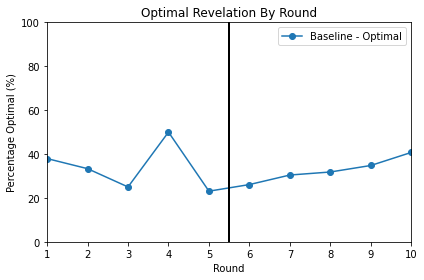

In [687]:
avgs_base = []
for i in range(1,11):
#     BASELINE
    avg_environment = base[f'optimal{i}'].mean()*100
    avgs_base.append(avg_environment)

plt.plot(range(1,11), avgs_det, label='Baseline - Optimal', marker="o")

plt.xlabel("Round")
plt.ylabel("Percentage Optimal (%)")
plt.xlim(1, 10)
plt.xticks(np.arange(1,11), range(1,11))  # Set text labels.
plt.ylim(0, 100)
plt.axvline(x=5.5, linewidth=2, color = 'k')
plt.legend()
plt.title('Optimal Revelation By Round')
plt.tight_layout()
plt.savefig(outputpath + 'environment_by_round.png',dpi=1000)
plt.show()

## Bonus Choice

#### Destring compTypes, chosen_decisions, and environment_choice

In [688]:
try:
    for ind in data.index:
        ini_list = data['participant.compType'][ind]
        res = ini_list.strip('][').split(' ')
        data['participant.compType'][ind] = res
    print(data['participant.compType'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')
try:
    for ind in data.index:
        ini_list = data['participant.chosen_decisions'][ind]
        res = ini_list.strip(')(').split(', ')
        data['participant.chosen_decisions'][ind] = res
    print(data['participant.chosen_decisions'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')
try:
    for ind in data.index:
        ini_list = data['participant.environment_choice'][ind]
        res = ini_list.strip('][').split(', ')
        data['participant.environment_choice'][ind] = res
    print(data['participant.environment_choice'])
except:
    print('you cannot run this code twice, and you have already run it. Run "cleaning data" again to be able to run this code')

1      [1, 1, 1, 0, 1, 0, 0, 1, 0, 1]
2      [1, 1, 0, 0, 1, 0, 0, 1, 0, 1]
3      [1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
4      [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]
6      [0, 0, 1, 0, 1, 0, 0, 1, 1, 1]
                    ...              
478    [1, 1, 1, 1, 1, 0, 1, 0, 1, 0]
479    [0, 0, 0, 0, 0, 0, 1, 1, 1, 0]
481    [0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
482    [0, 1, 0, 1, 1, 1, 0, 0, 1, 1]
483    [1, 0, 0, 0, 0, 1, 1, 1, 0, 0]
Name: participant.compType, Length: 81, dtype: object
1      [4, 7]
2      [4, 8]
3      [5, 6]
4         [8]
6         [3]
        ...  
478       [9]
479       [6]
481    [2, 7]
482    [4, 8]
483    [1, 7]
Name: participant.chosen_decisions, Length: 81, dtype: object
1        [True, True]
2      [False, False]
3       [True, False]
4                 [0]
6                 [0]
            ...      
478               [0]
479               [0]
481    [False, False]
482      [True, True]
483    [False, False]
Name: participant.environment_choice, Length: 81, dtype: object


### Part 2: Bonus Choice - Do people know what to do with the information?


#### Baseline

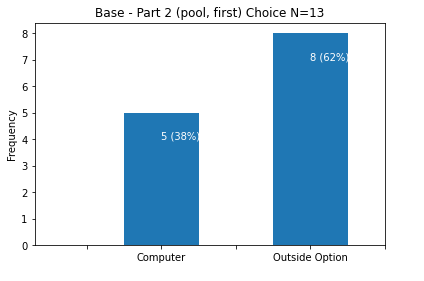

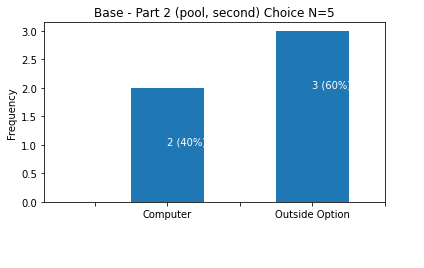

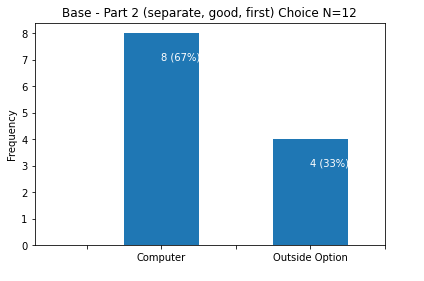

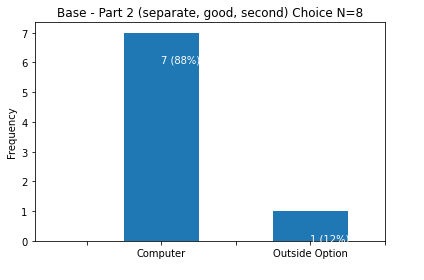

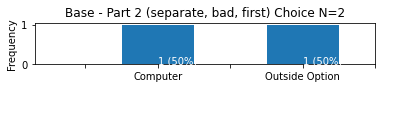

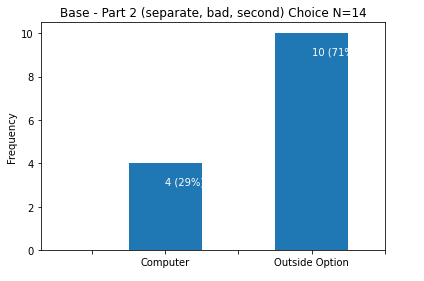

In [689]:
base_all = data[data['participant.treatment']=='base']
myList = []
myList2 = []
for ind in base_all.index:
    myList.append(int(base_all['participant.chosen_decisions'][ind][0]))
    myList2.append(int(base_all['participant.chosen_decisions'][ind][1]))
    # print(myList,  data['participant.compType'])
base_all['RoundCounts1'] = myList
base_all['RoundCounts2'] = myList2

myList = []
myList2 = []
for ind in base_all.index:
    myList.append(int(base_all['participant.compType'][ind][base_all['RoundCounts1'][ind]-1]))
    myList2.append(int(base_all['participant.compType'][ind][base_all['RoundCounts2'][ind]-1]))
    # print(myList,  data['participant.compType'])
base_all['RoundCounts1CompType'] = myList
base_all['RoundCounts2CompType'] = myList2
#%%
myList = []
myList2 = []
for ind in base_all.index:
    r1 = base_all['RoundCounts1'][ind]
    r2 = base_all['RoundCounts2'][ind]
    myList.append(int(base_all[f'informational_cost.{r1}.player.environment_choice'][ind]))
    myList2.append(int(base_all[f'informational_cost.{r2}.player.environment_choice'][ind]))
    # print(myList,  data['participant.compType'])
base_all['EnvChoice1'] = myList
base_all['EnvChoice2'] = myList2
#%%
base_pool1 = base_all[base_all['EnvChoice1']==1]
base_sep_good1 = base_all[(base_all['EnvChoice1']==0) & (base_all['RoundCounts1CompType']==1)]
base_sep_bad1 = base_all[(base_all['EnvChoice1']==0) & (base_all['RoundCounts1CompType']==0)]
base_pool2 = base_all[base_all['EnvChoice2']==1]
base_sep_good2 = base_all[(base_all['EnvChoice2']==0) & (base_all['RoundCounts2CompType']==1)]
base_sep_bad2 = base_all[(base_all['EnvChoice2']==0) & (base_all['RoundCounts2CompType']==0)]
base_sep_bad2
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_pool1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (pool, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who pool in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_pool2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (pool, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_good1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, good, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_good2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, good, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_bad1['informational_cost.5.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, bad, first) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in second part 2
fig, ax = plt.subplots()
y = [int(i) for i in base_sep_bad2['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Base - Part 2 (separate, bad, second) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

### Salient part 2

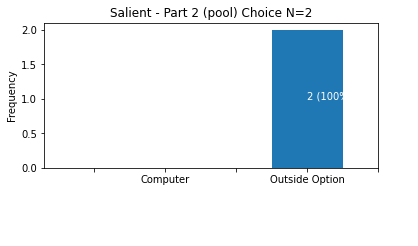

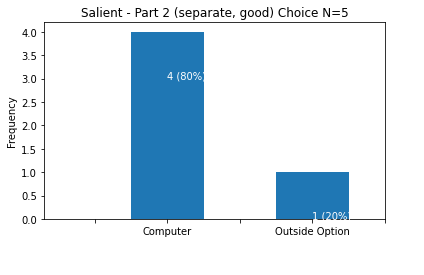

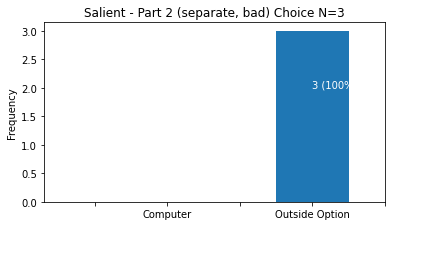

In [690]:
#%%
salient_all = data[data['participant.treatment']=='salient']
for ind in salient_all.index:
    salient_all['participant.chosen_decisions'][ind] = int(salient_all['participant.chosen_decisions'][ind][0])
salient_all = salient_all[(salient_all['participant.chosen_decisions']<6)]
#%%
myList = []
for ind in salient_all.index:
    myList.append(int(salient_all['participant.compType'][ind][int(salient_all['participant.chosen_decisions'][ind])-1]))
    # print(myList,  data['participant.compType'])
salient_all['RoundCounts1CompType'] = myList
#%%
myList = []
for ind in salient_all.index:
    r1 = int(salient_all['participant.chosen_decisions'][ind])
    myList.append(int(salient_all[f'informational_cost.{r1}.player.environment_choice'][ind]))
    # print(myList,  data['participant.compType'])
salient_all['EnvChoice1'] = myList
#%%
salient_pool = salient_all[salient_all['EnvChoice1']==1]
salient_sep_good = salient_all[(salient_all['EnvChoice1']==0) & (salient_all['RoundCounts1CompType']==1)]
salient_sep_bad = salient_all[(salient_all['EnvChoice1']==0) & (salient_all['RoundCounts1CompType']==0)]
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_pool['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (pool) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Good in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_sep_good['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (separate, good) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate and Bad in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in salient_sep_bad['informational_cost.10.player.bonusChoice']]
xLabels = ['','Computer','', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Salient - Part 2 (separate, bad) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

### Deterministic part 2

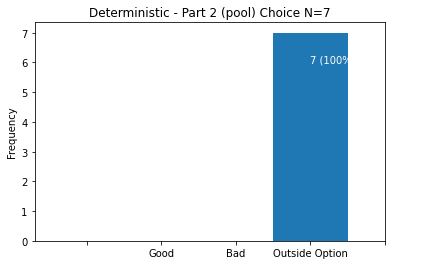

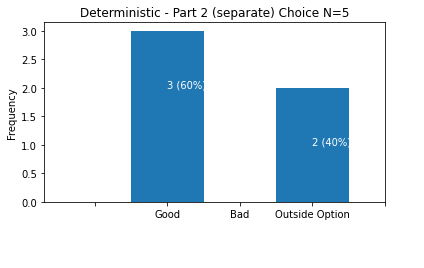

In [691]:
#%%
det_all = data[(data['participant.treatment'] == 'deterministic')]
for ind in det_all.index:
    det_all['participant.chosen_decisions'][ind] = int(det_all['participant.chosen_decisions'][ind][0])
det_all = det_all[(det_all['participant.chosen_decisions']<6)]

myList = []
for ind in det_all.index:
    r1 = int(det_all['participant.chosen_decisions'][ind])
    myList.append(int(det_all[f'informational_cost.{r1}.player.environment_choice'][ind]))
    # print(myList,  data['participant.compType'])
det_all['EnvChoice1'] = myList
det_pool = det_all[det_all['EnvChoice1'] == 1]
det_sep = det_all[det_all['EnvChoice1'] == 0]
#%%
# Those who pool in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_pool['informational_cost.10.player.bonusChoice']]
xLabels = ['', 'Good', 'Bad', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Deterministic - Part 2 (pool) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()

# Those who separate in first part 2
fig, ax = plt.subplots()
y = [int(i) for i in det_sep['informational_cost.10.player.bonusChoice']]
xLabels = ['', 'Good', 'Bad', 'Outside Option', '']
x = np.arange(max(y)+2)
ax.hist(y,x-0.5, width=1)
plt.ylabel('Frequency')
for i in range(max(y)+2):
    plt.text(i,y.count(i)-1,str(y.count(i))+ ' (' + str(round(y.count(i)*100/len(y))) +'%)', color='white')
plt.xticks(x, xLabels)
plt.title(f'Deterministic - Part 2 (separate) Choice N={len(y)}')
plt.tight_layout()
# plt.savefig(outputpath + baseline['inference.1.player.bonusChoice'].name[19:] +'.png',dpi=1000)
plt.show()